<a href="https://colab.research.google.com/github/stevwhi/monte-python/blob/main/calculatePI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()


Calculating PI

In [ ]:
import random
from pyspark import SparkContext
import sys

def sample(p):
    x, y = random.random(), random.random()
    return 1 if x*x + y*y < 1 else 0

if 'sc' in locals() and sc is not None:
    sc.stop()
sc = SparkContext(appName="miPi")

sampleNum = int(input("Number of samples: "))
partitionNum = int(input("Number of Partitions: "))

count = sc.parallelize(range(sampleNum), partitionNum).map(sample).reduce(lambda a, b: a + b)
piEstimate = 4.0 * count / sampleNum
print("Pi:", sampleNum, ":", piEstimate)

sc.stop()


Enter the number of samples: 10000
Enter the number of partitions: 4
Pi: 10000 : 3.1364


Plotting Sample/Partition, Accuracy Relationship

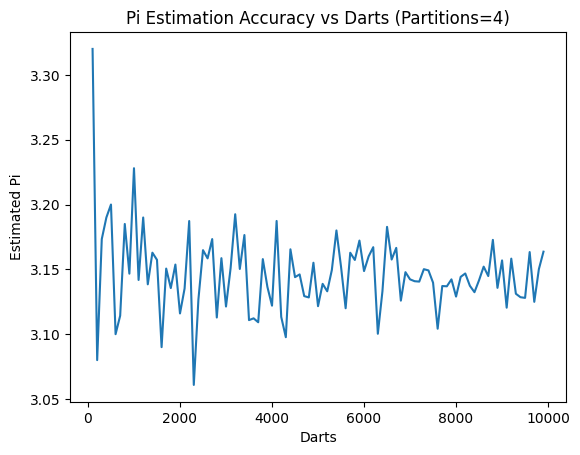

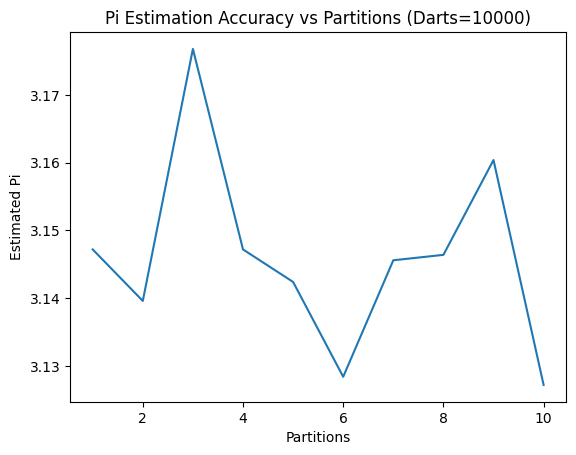

In [ ]:
import random
from pyspark import SparkContext
import matplotlib.pyplot as plt
import numpy as np

def sample(p):
    x, y = random.random(), random.random()
    return 1 if x*x + y*y < 1 else 0

def calculate_pi(sampleNum, partitionNum):
    sc = SparkContext(appName="miPi")

    count = sc.parallelize(range(sampleNum), partitionNum).map(sample).reduce(lambda a, b: a + b)
    piEstimate = 4.0 * count / sampleNum

    sc.stop()

    return piEstimate

def accVsamples(fixedPartitionNo, maxDartNo):
    dartCounts = np.arange(100, maxDartNo, 100)
    piEstimates = [calculate_pi(darts, fixedPartitionNo) for darts in dartCounts]

    plt.figure()
    plt.plot(dartCounts, piEstimates)
    plt.xlabel('Darts')
    plt.ylabel('Estimated Pi')
    plt.title(f'Pi Estimation Accuracy vs Darts (Partitions={fixedPartitionNo})')

    plt.show()

def accVpartitions(fixedDartNo, maxPartitionNo):
    partitionCounts = np.arange(1, maxPartitionNo + 1)
    piEstimates = [calculate_pi(fixedDartNo, partitions) for partitions in partitionCounts]

    plt.figure()
    plt.plot(partitionCounts, piEstimates)
    plt.xlabel('Partitions')
    plt.ylabel('Estimated Pi')
    plt.title(f'Pi Estimation Accuracy vs Partitions (Darts={fixedDartNo})')

    plt.show()

accVsamples(fixedPartitionNo=4, maxDartNo=10000)
accVpartitions(fixedDartNo=10000, maxPartitionNo=10)